In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1424,2020-08-26,United Kingdom,327803.0,327798.0,41475.0,41449.0,5.0,26.0
1425,2020-08-26,Germany,235562.0,236429.0,9286.0,9280.0,-867.0,6.0
1426,2020-08-26,Iran,364165.0,361150.0,20961.0,20776.0,3015.0,185.0
1427,2020-08-26,Turkey,260734.0,261194.0,6156.0,6163.0,-460.0,-7.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  7100.594821553534
RMSE =  28277.923754456253


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  298.2449265220434
RMSE =  731.6958311779499


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  48656.93382352941
RMSE =  88536.46498655893
-- World performances for deaths --
MAE =  1645.0808823529412
RMSE =  2020.70266790016


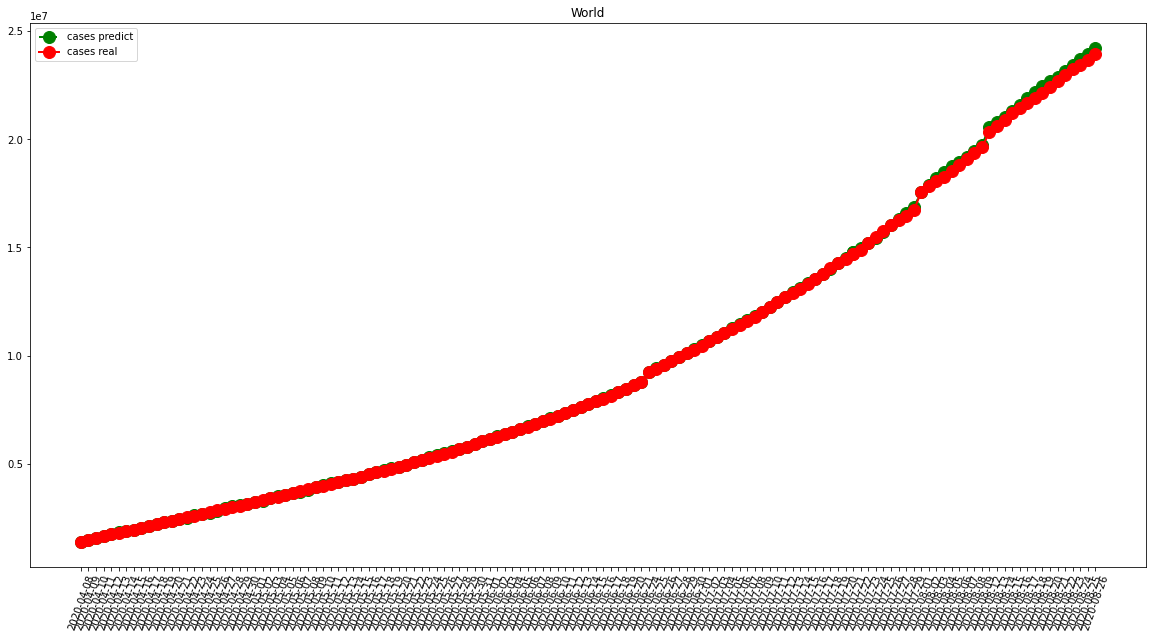

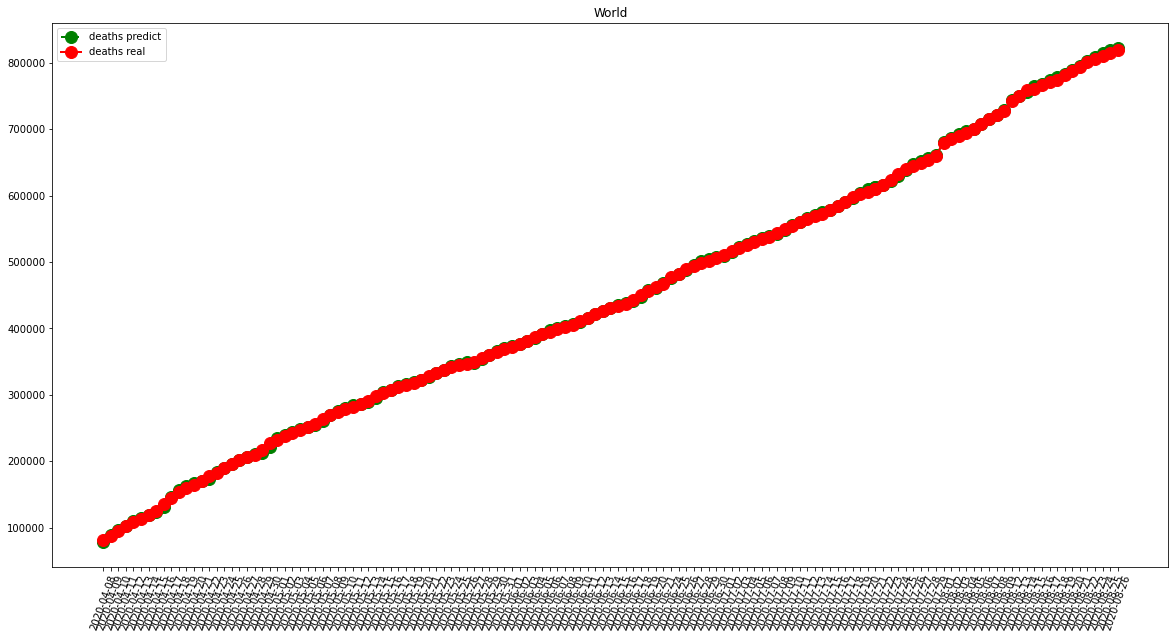

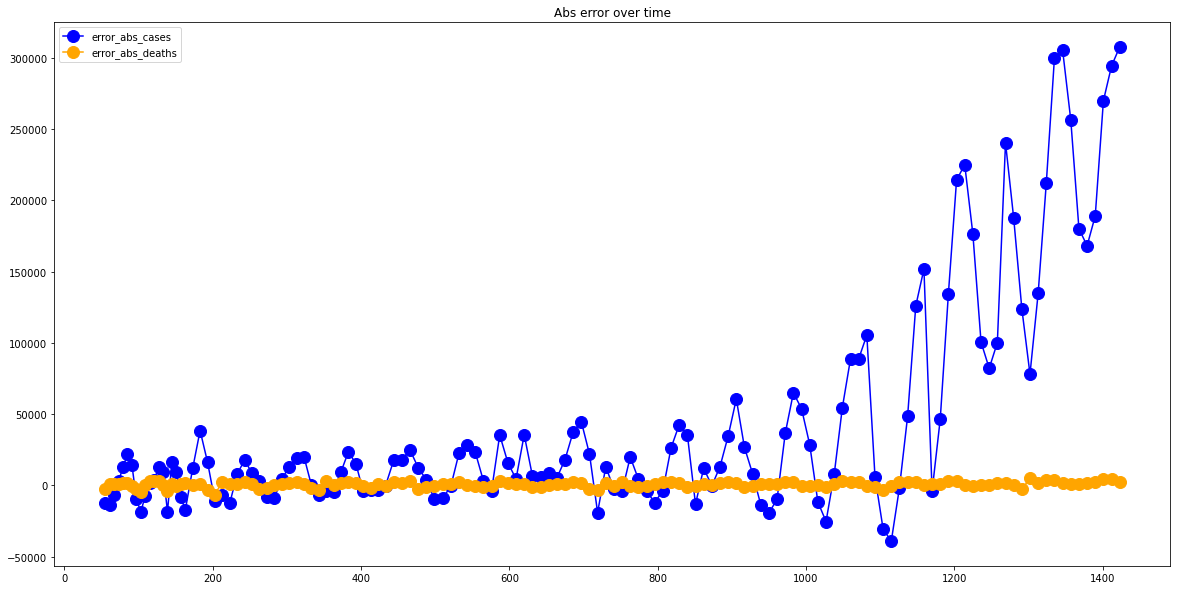

In [7]:
visShow("World")

-- France performances for cases --
MAE =  920.4589041095891
RMSE =  1395.7957837244724
-- France performances for deaths --
MAE =  127.04794520547945
RMSE =  277.5422095505327


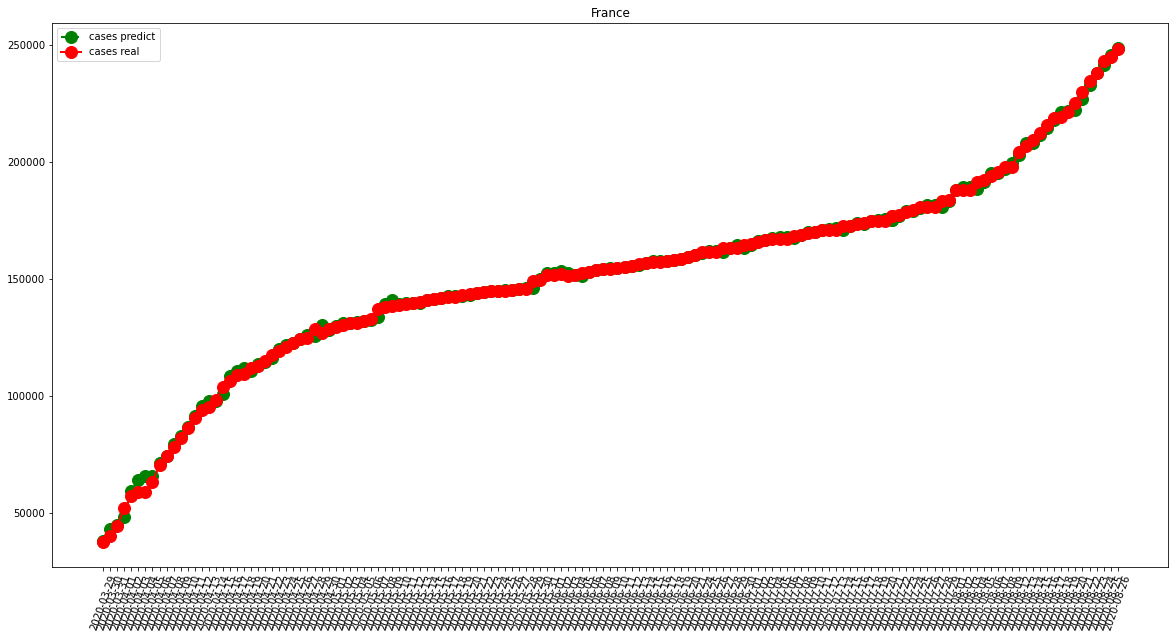

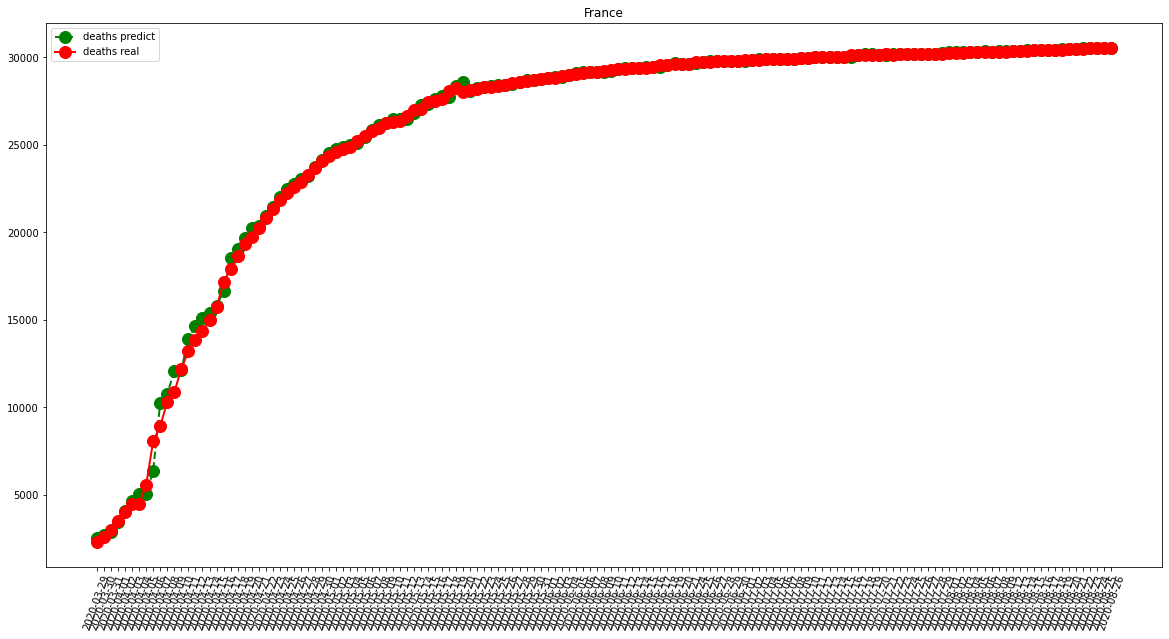

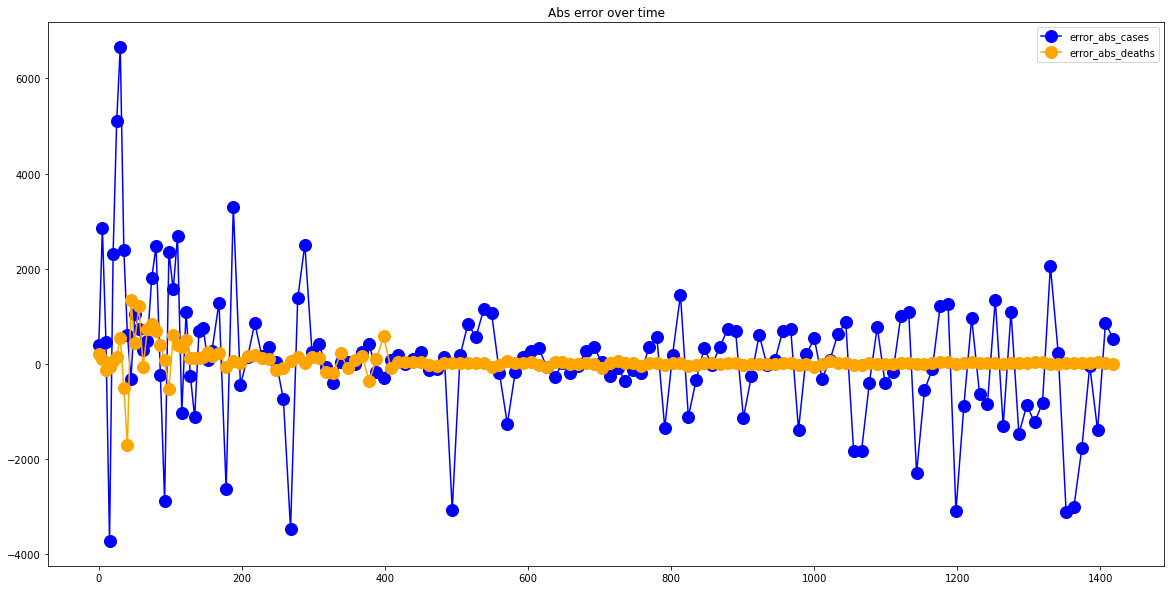

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  301.85616438356163
RMSE =  459.2751510625865
-- Italy performances for deaths --
MAE =  75.45205479452055
RMSE =  245.6374151590661


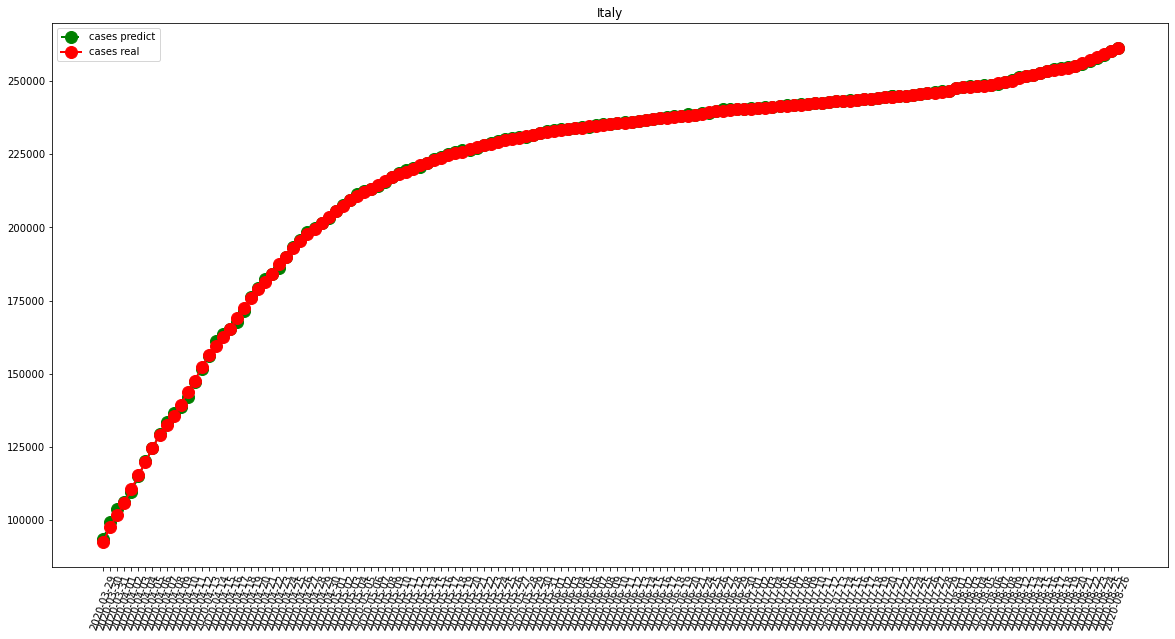

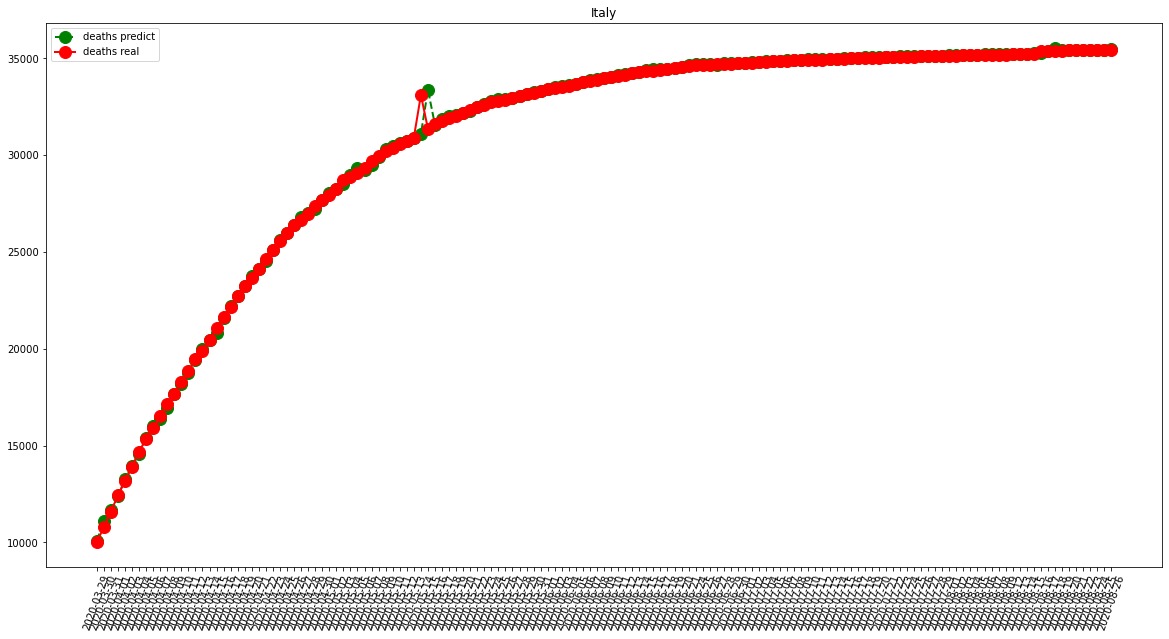

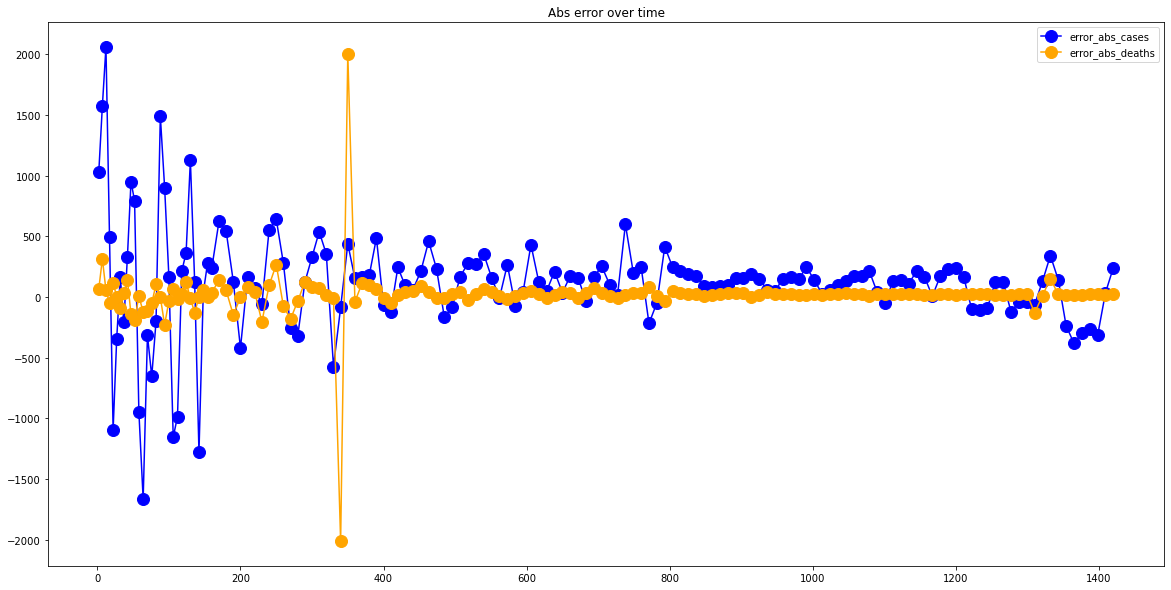

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1677.5753424657535
RMSE =  3275.6604039783765
-- Spain performances for deaths --
MAE =  130.26712328767124
RMSE =  336.22691905302645


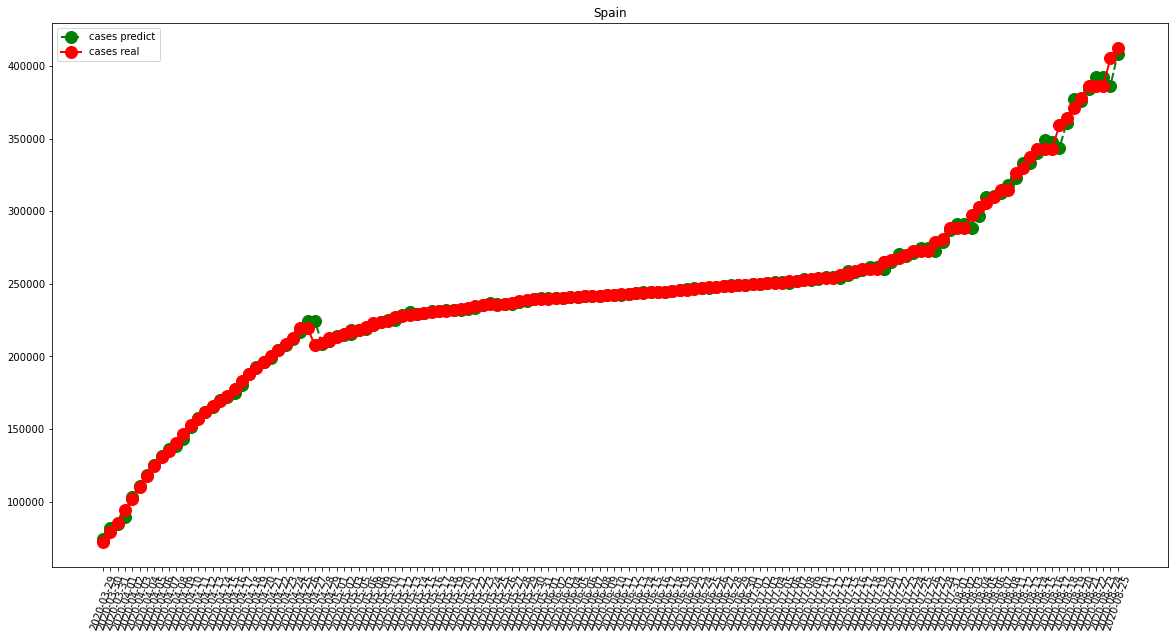

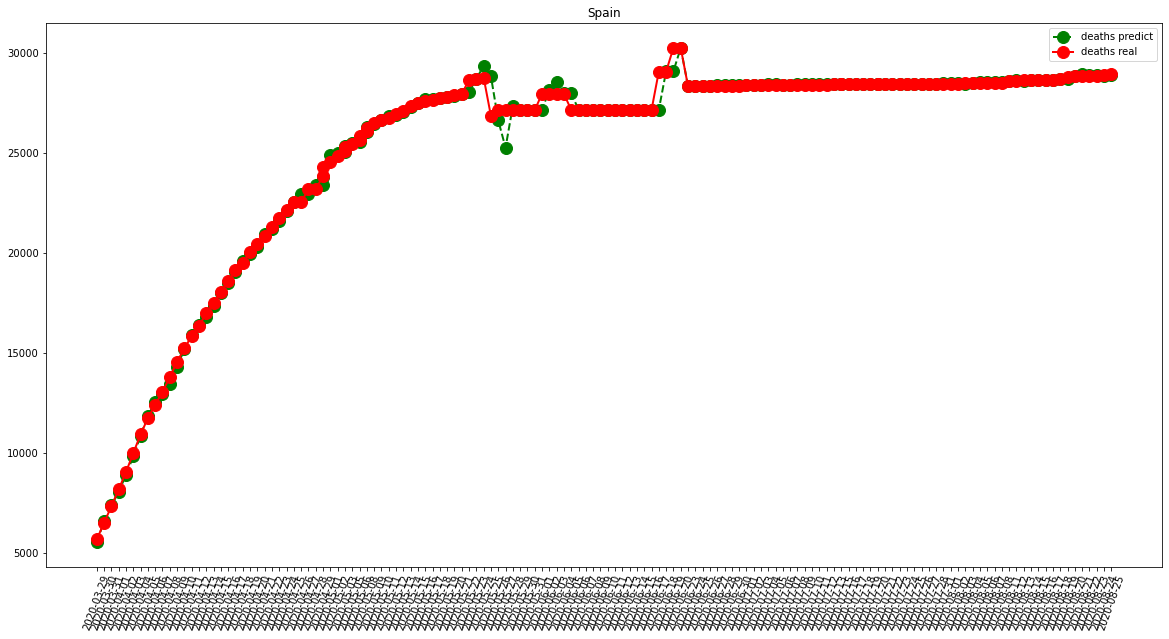

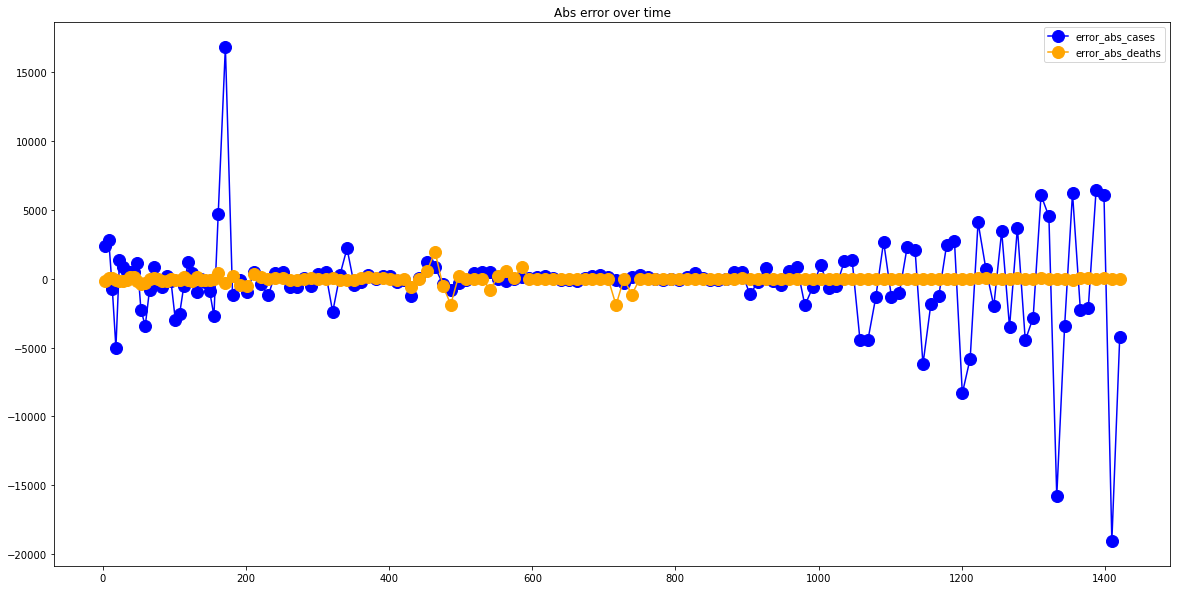

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  10807.082191780823
RMSE =  17140.33824653059
-- United States performances for deaths --
MAE =  493.3904109589041
RMSE =  699.6445428225463


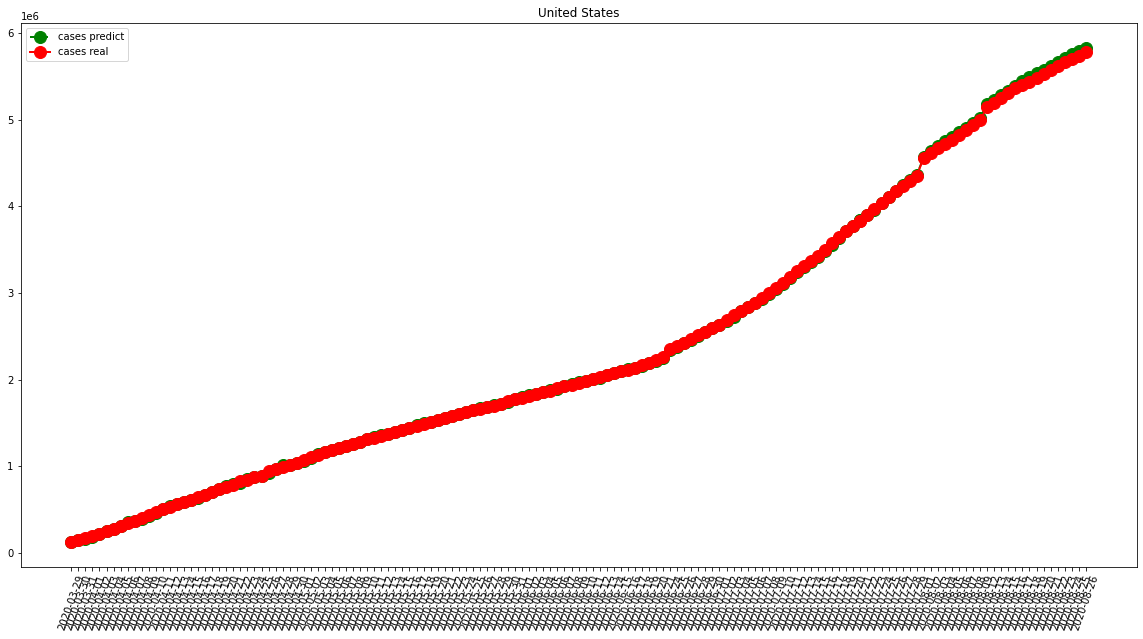

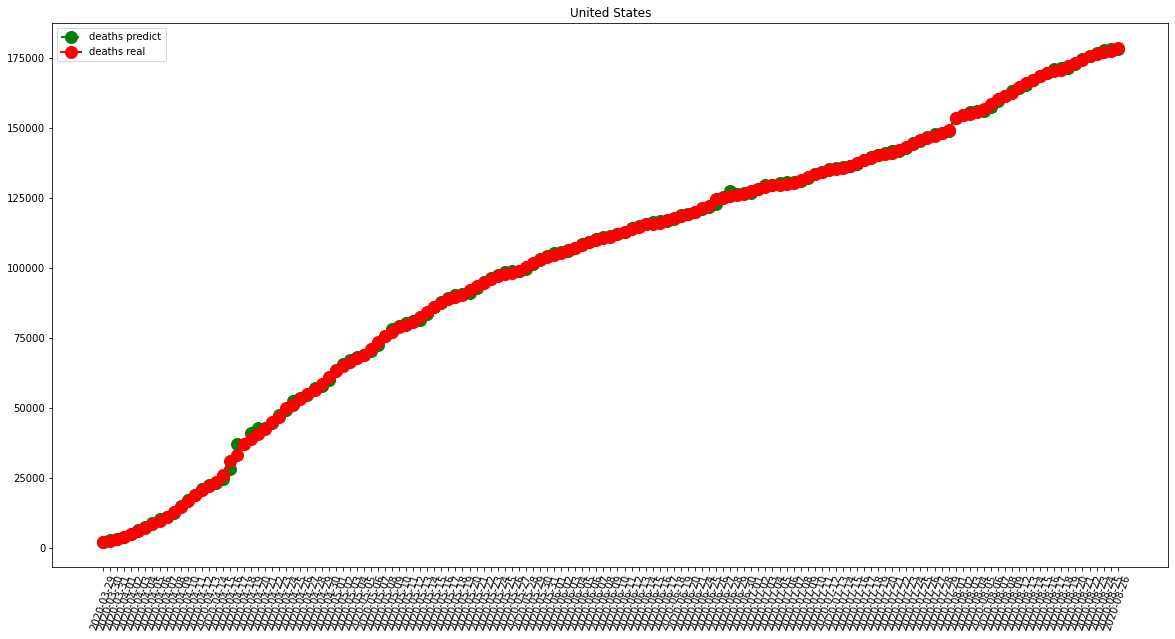

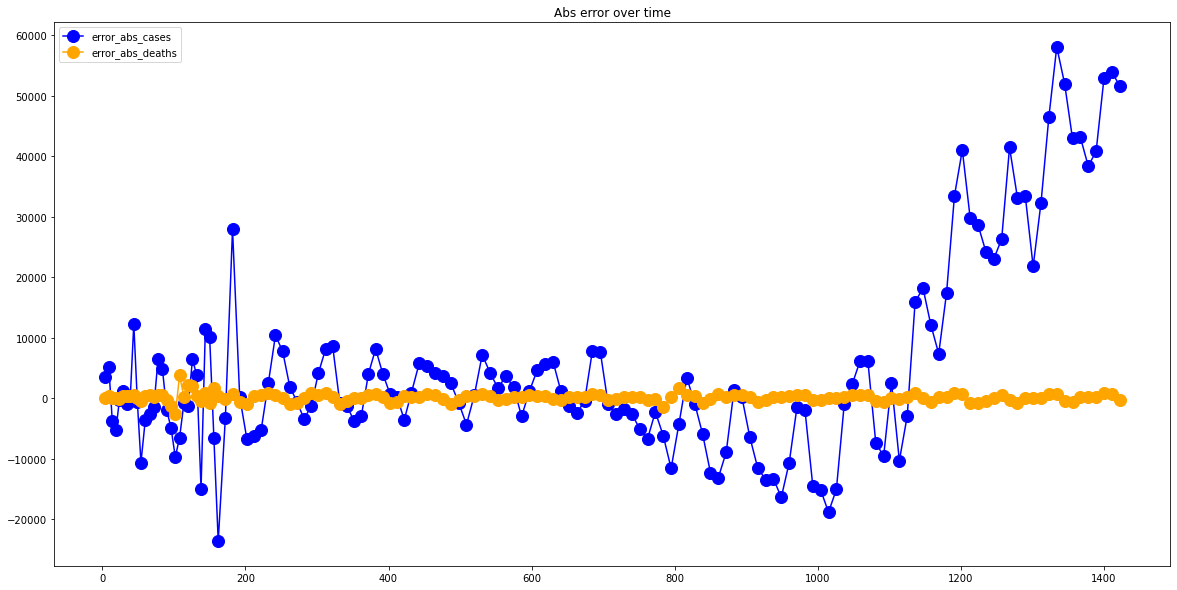

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  68.23287671232876
RMSE =  98.73459650976048
-- China performances for deaths --
MAE =  28.36986301369863
RMSE =  129.94898893807292


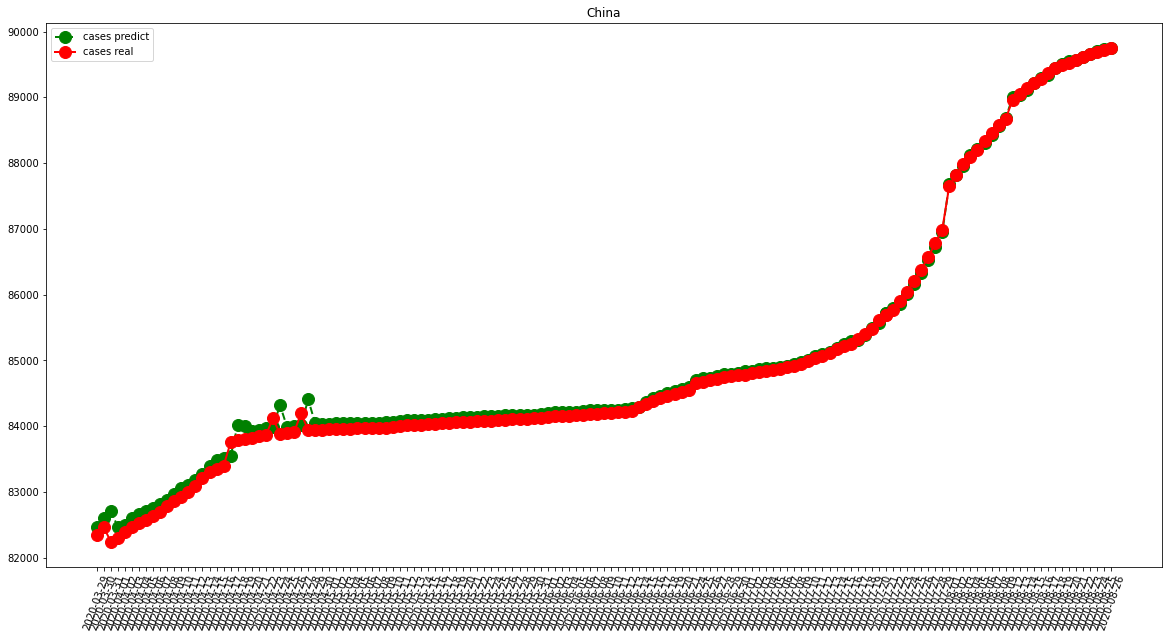

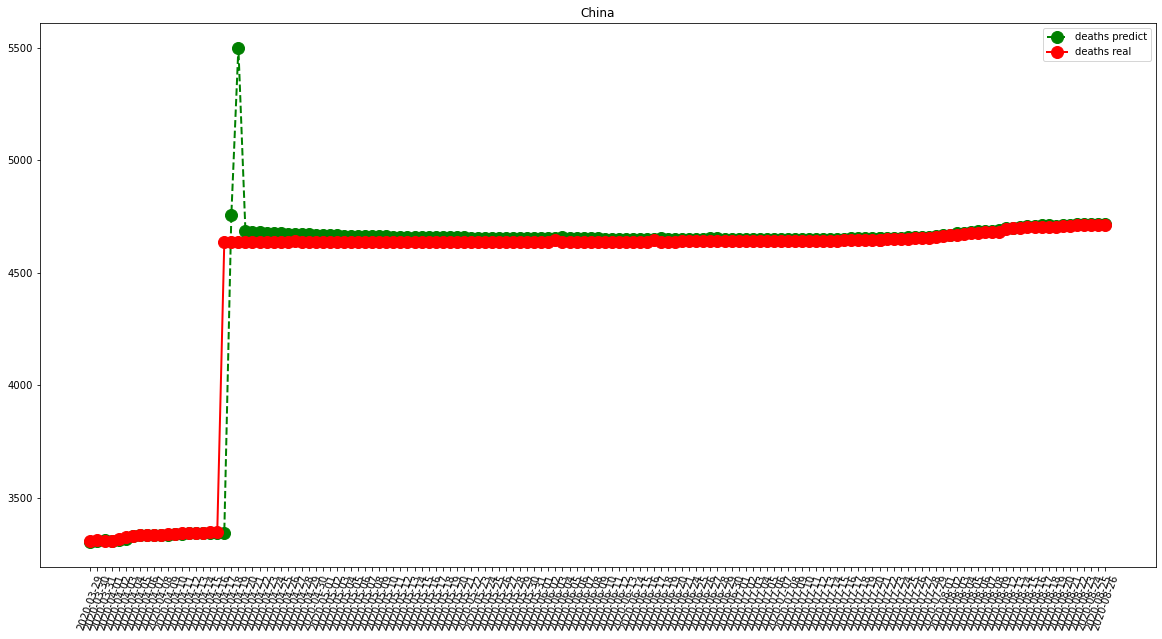

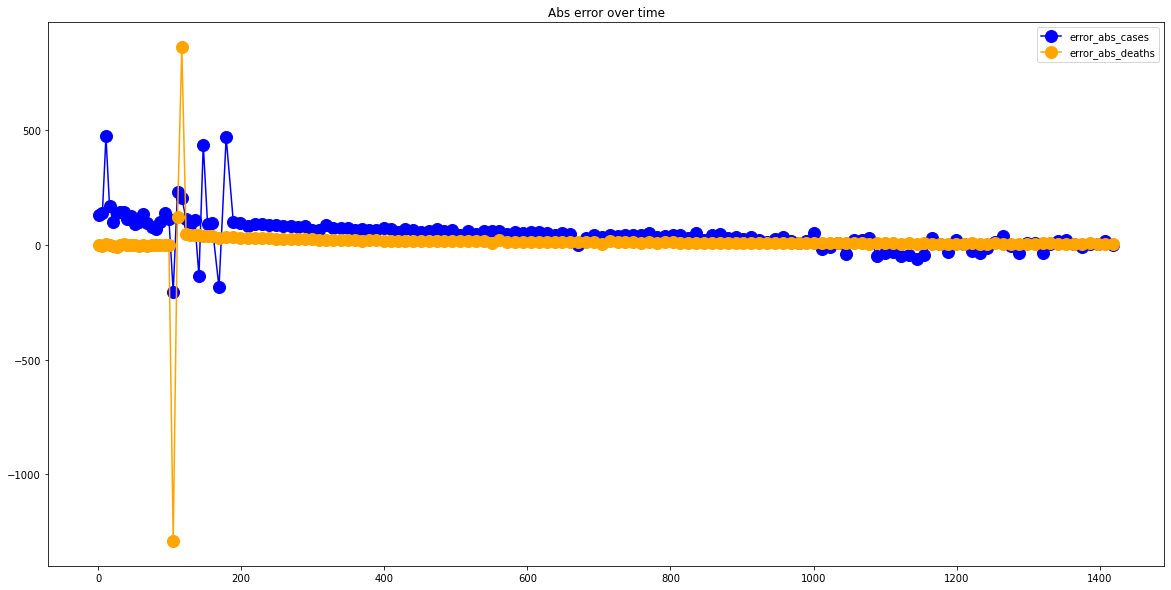

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1101.584745762712
RMSE =  3848.774521007865
-- United Kingdom performances for deaths --
MAE =  254.39830508474577
RMSE =  785.5840049374474


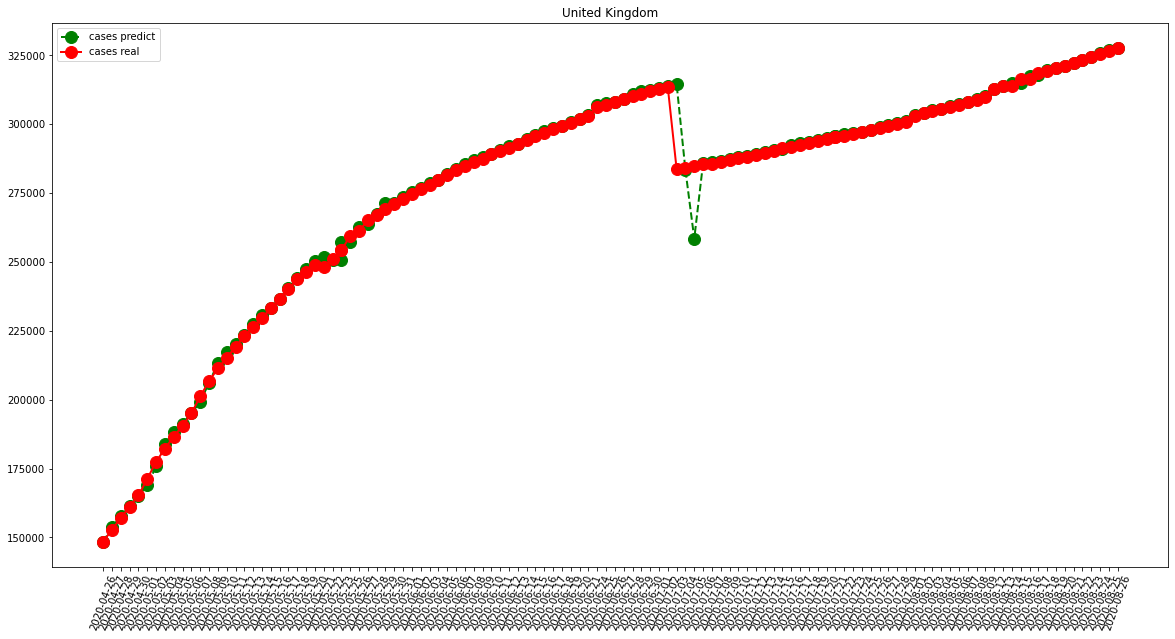

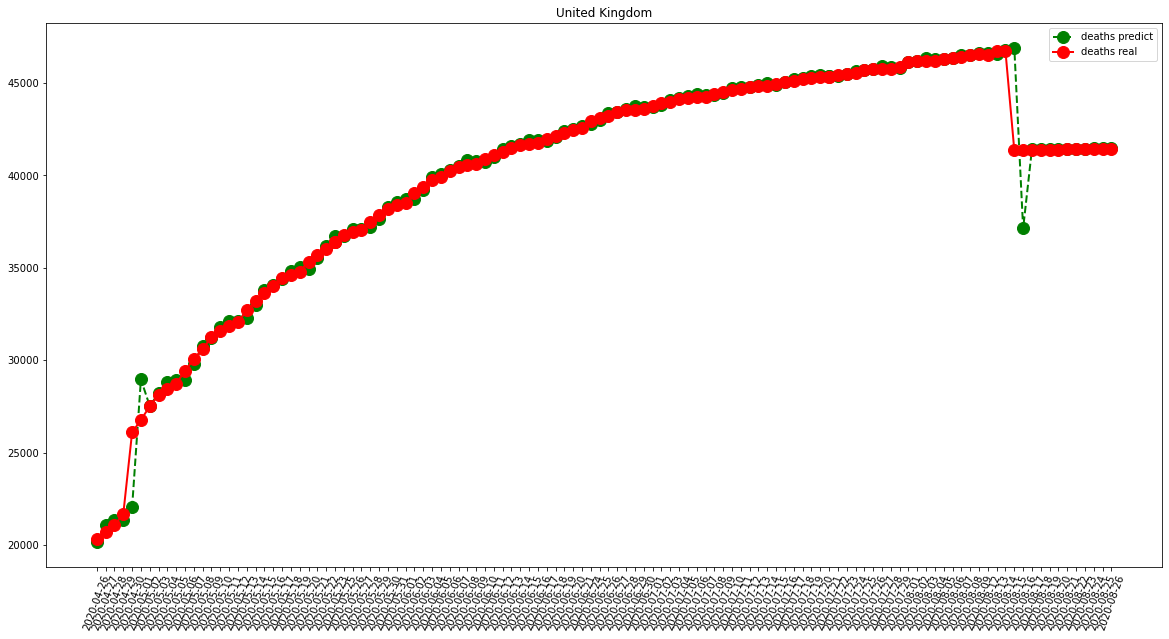

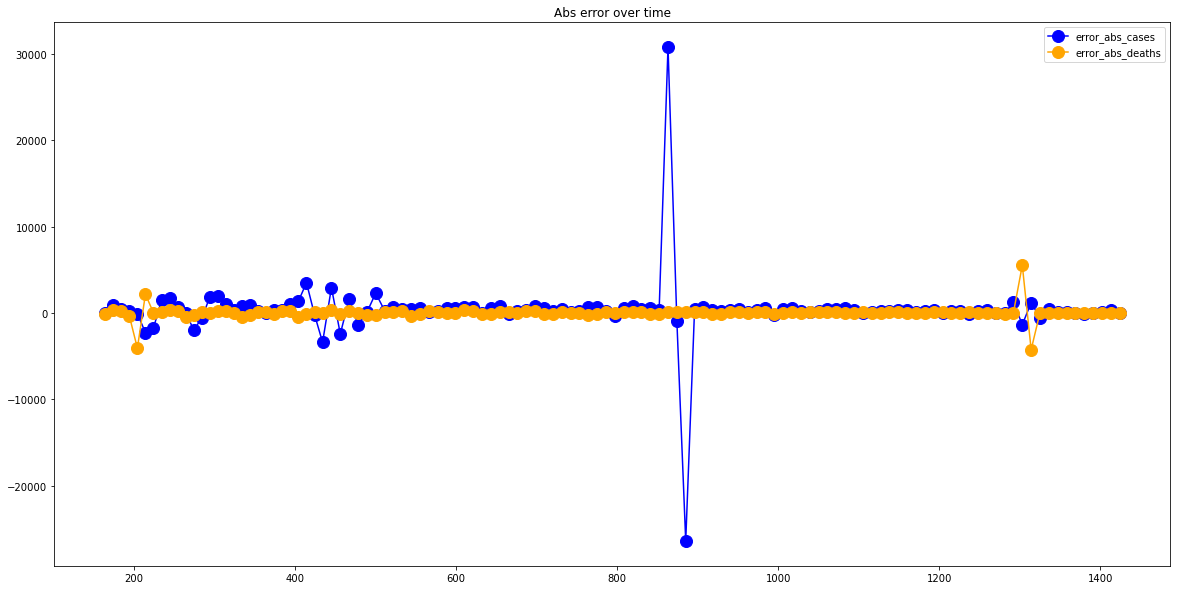

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  399.54237288135596
RMSE =  589.665791582581
-- Germany performances for deaths --
MAE =  21.822033898305083
RMSE =  40.43377091625854


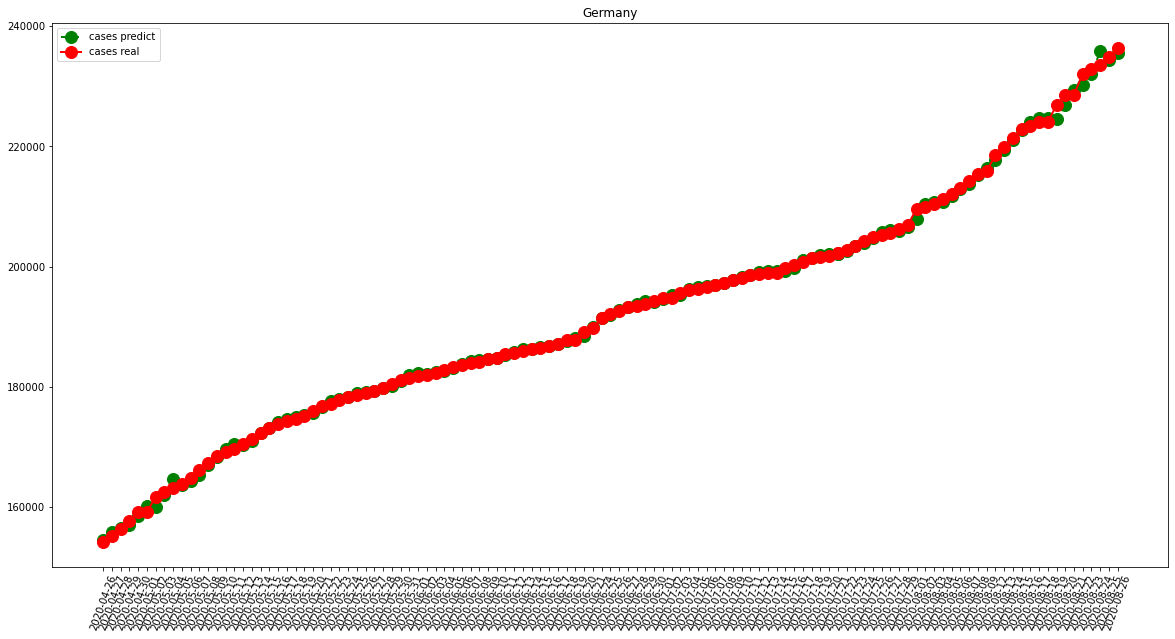

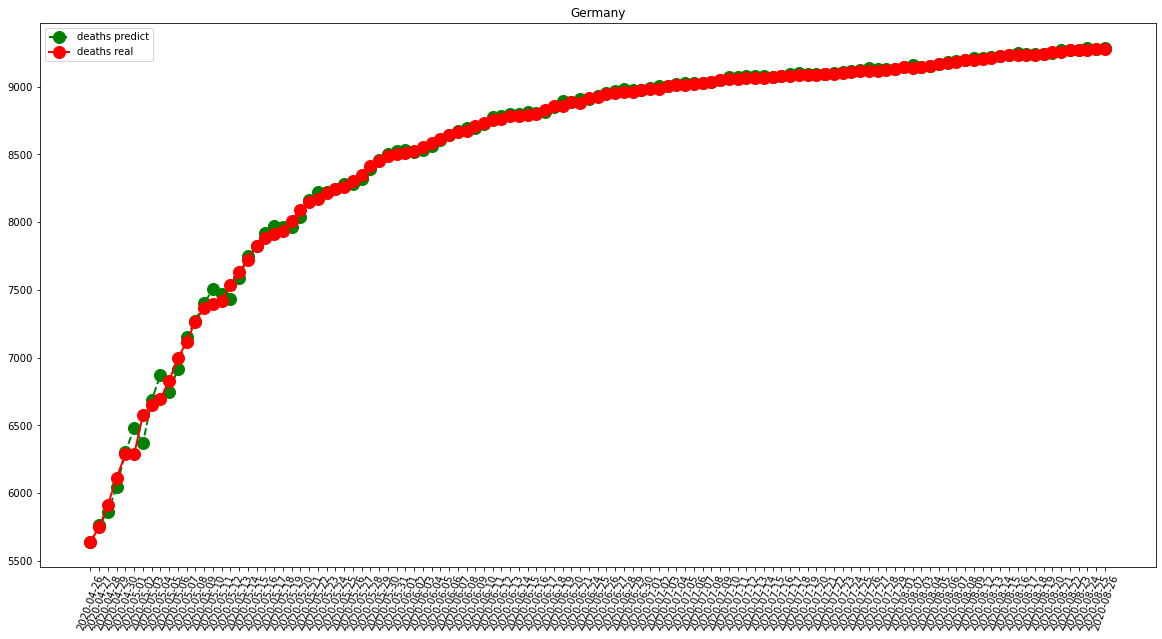

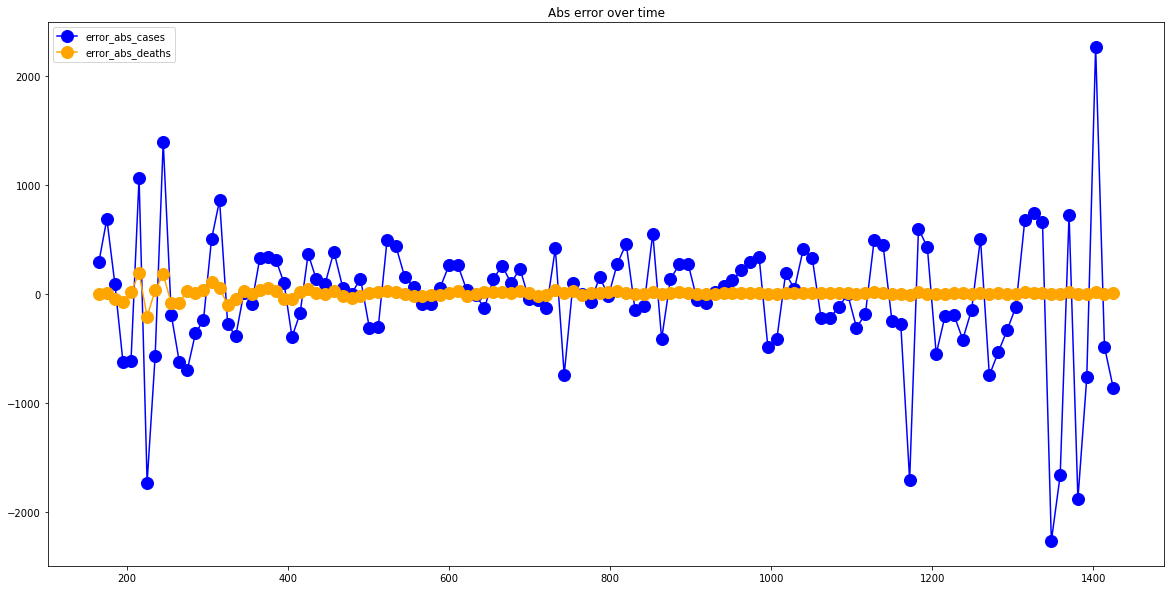

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  747.9661016949152
RMSE =  1119.427290013567
-- Iran performances for deaths --
MAE =  41.25423728813559
RMSE =  79.66284887904413


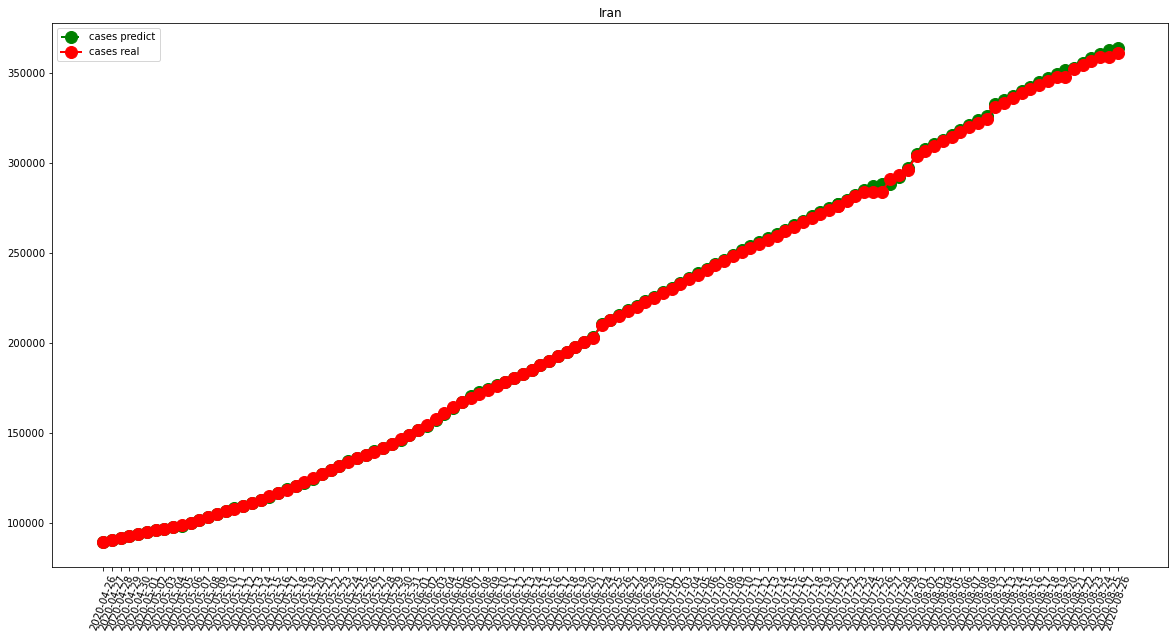

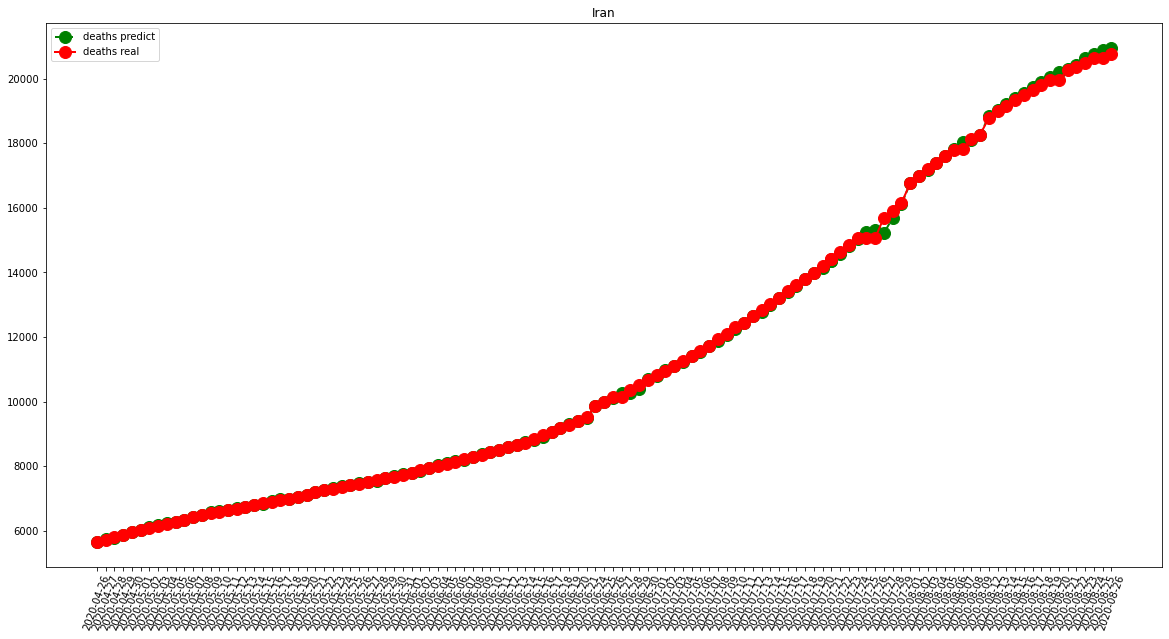

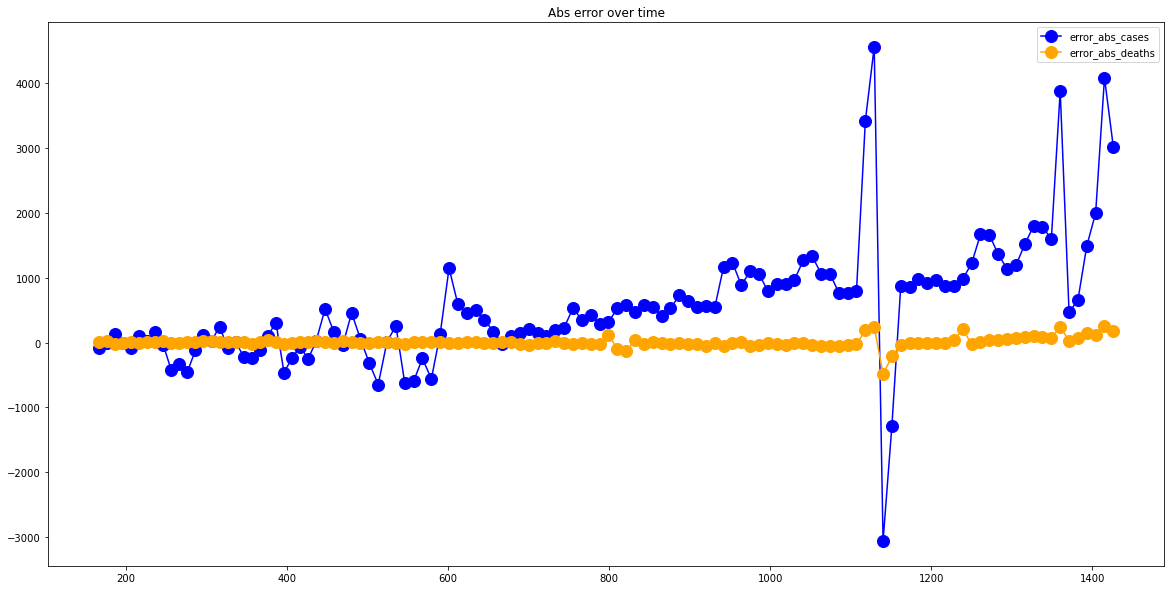

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  199.02542372881356
RMSE =  328.3339427566113
-- Turkey performances for deaths --
MAE =  16.550847457627118
RMSE =  93.45972575919025


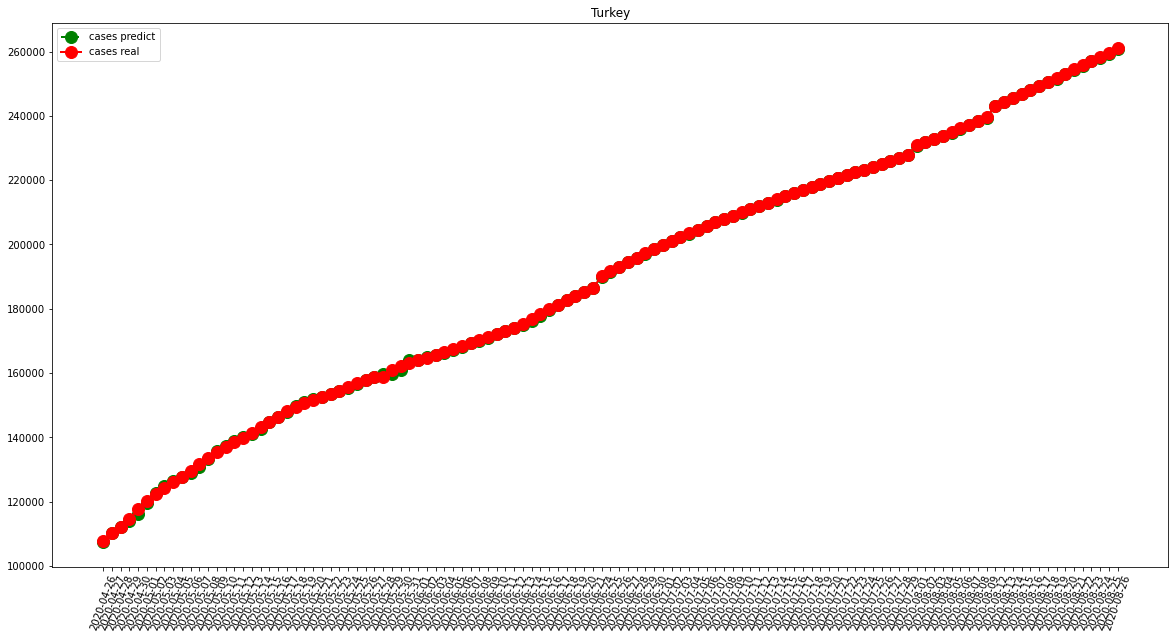

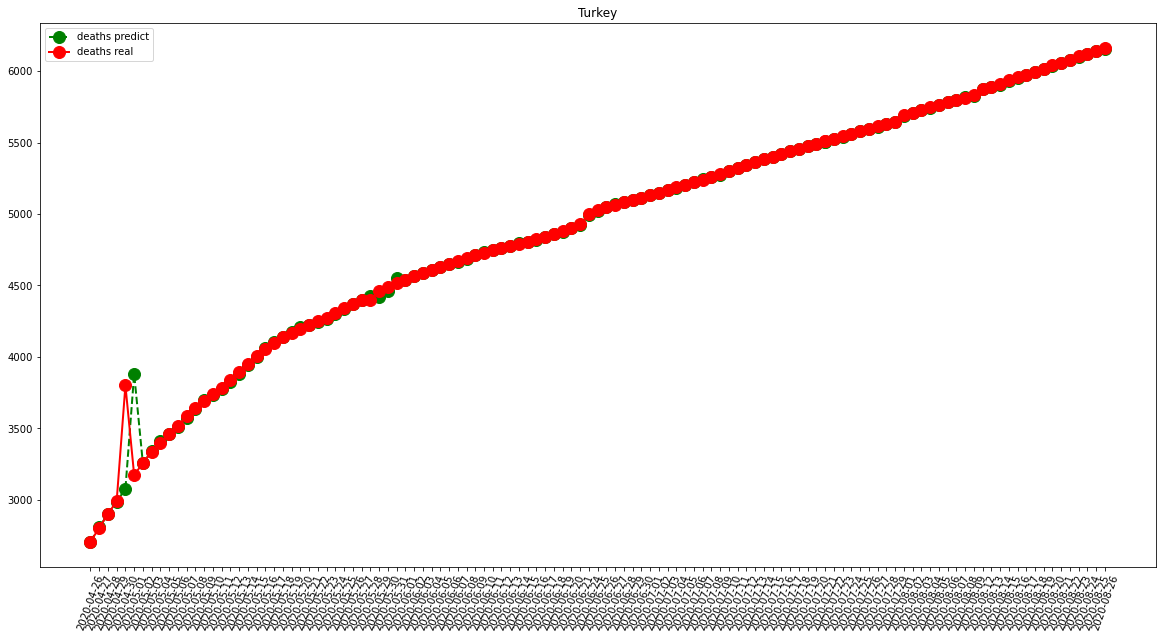

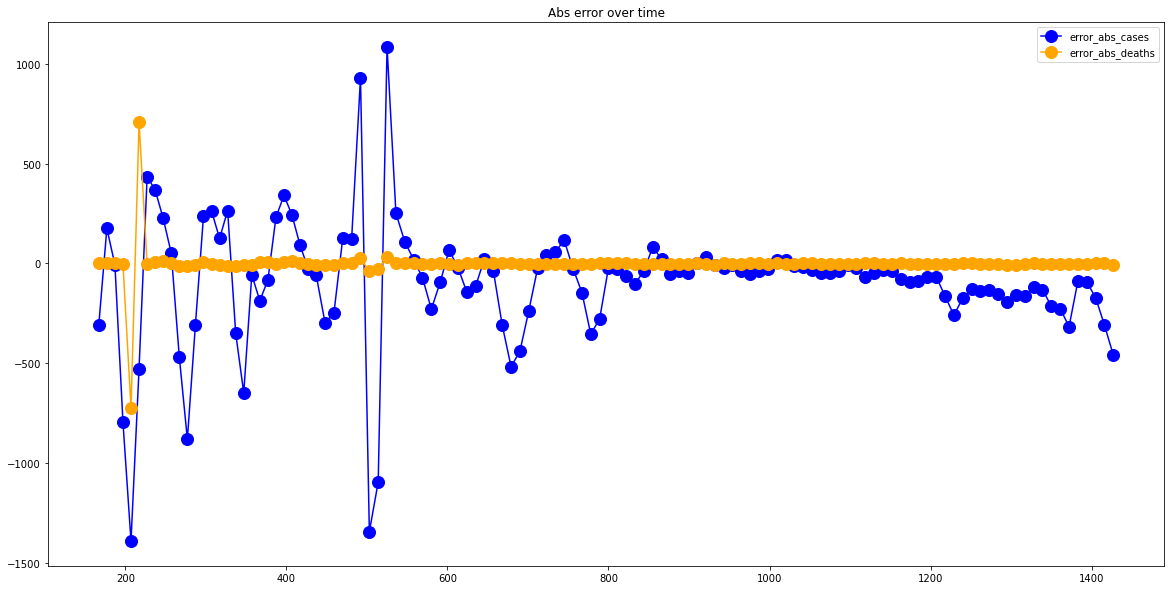

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  13509.329670329671
RMSE =  18125.53063202034
-- Brazil performances for deaths --
MAE =  420.7142857142857
RMSE =  518.3124243453645


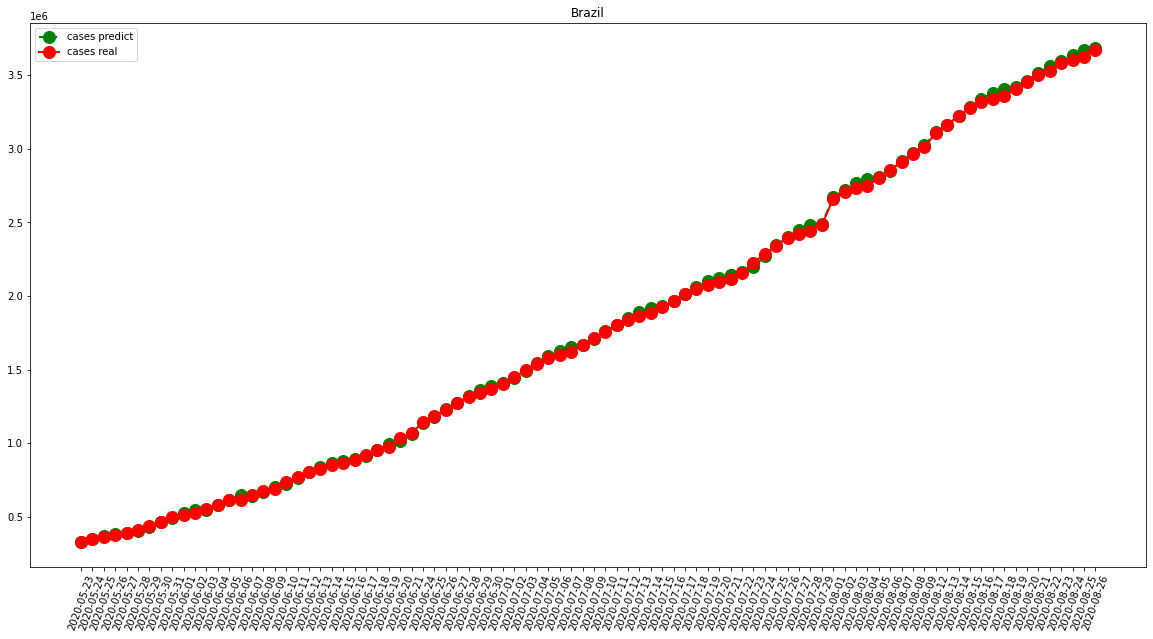

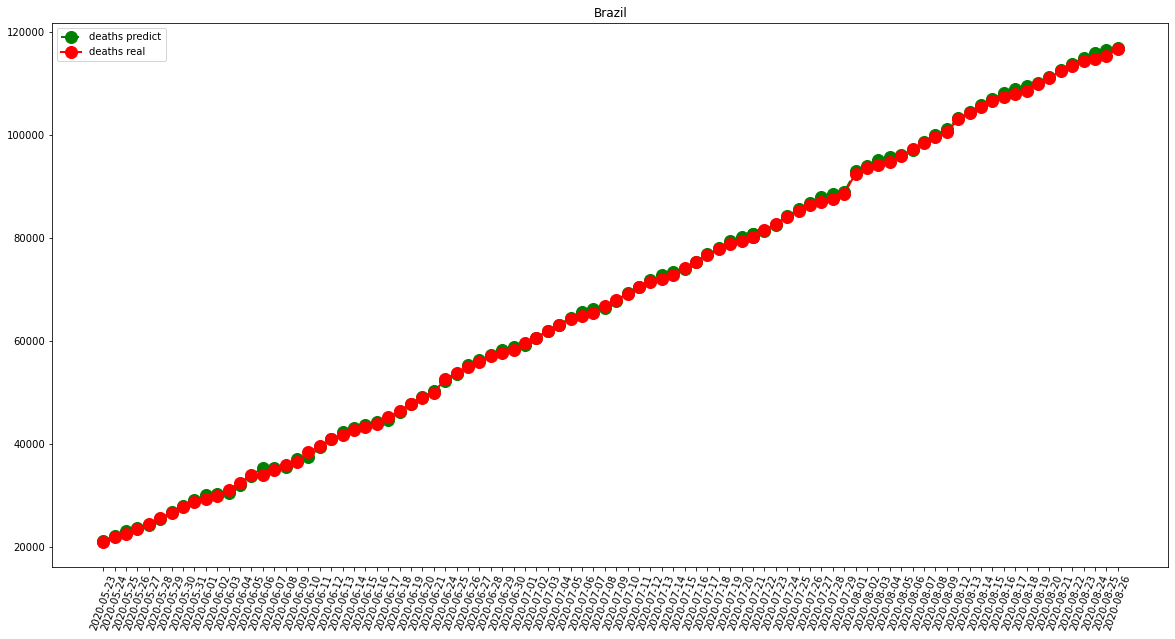

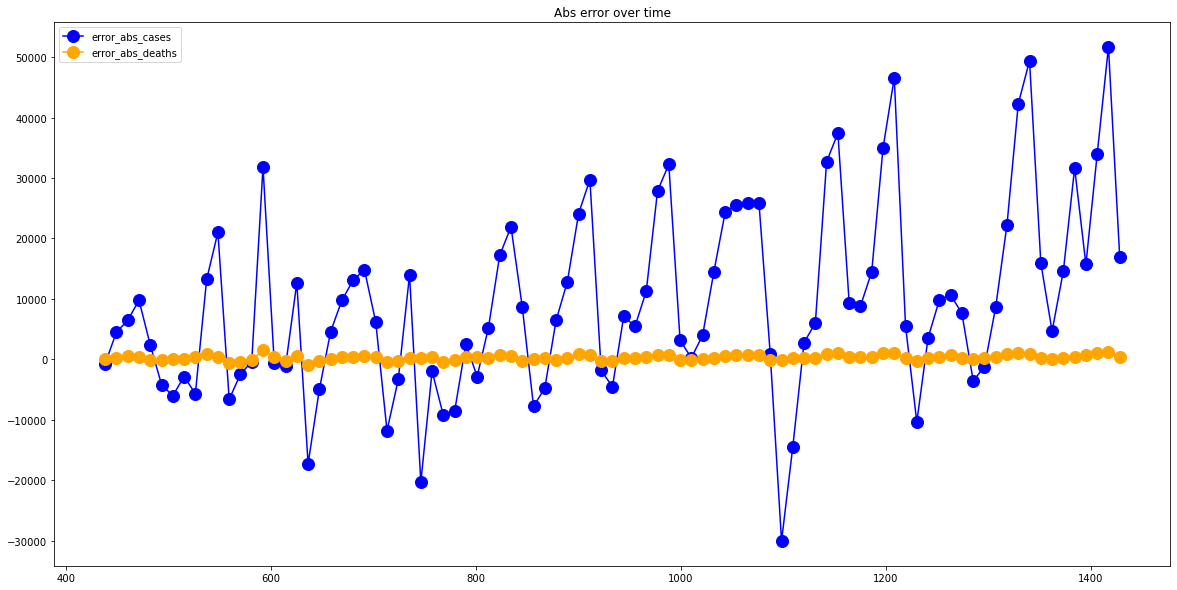

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)